$100(x_1^2-x_2)^2+(x_1-1)^2$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

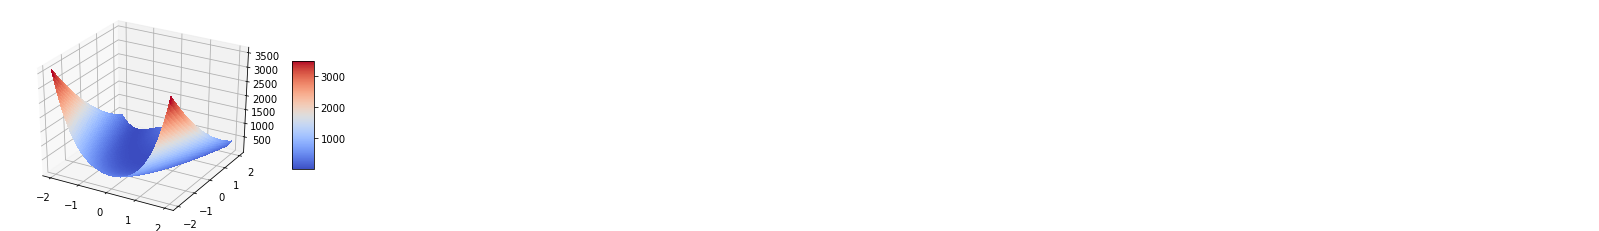

In [7]:
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(x1, x2)
y = 100*np.square(np.square(x1)-x2)+np.square(x1-1)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x1, x2, y, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=\
       0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

In [8]:
def func(x):
    return 100*np.square(np.square(x[0])-x[1])+np.square(x[0]-1)
#x size(2)

In [9]:
def dfunc(x):
    df1 = 400*x[0]*(np.square(x[0])-x[1])+2*(x[0]-1)
    df2 = -200*(np.square(x[0])-x[1])
    return np.array([df1, df2])
# Gradient

In [11]:
def grad(x, max_int):
    #input initial x0 and the maximum number of iterrations
    m_iter = 1 #counter of itterations
    step = .0001/m_iter
    vals = []# als recorder of x's historical value 
    objectfs = []# als recorder of objectivfunction's historical value 
    # you can customize your own condition of convergence, here we limit the number of iterations
    while m_iter <= max_int:
        vals.append(x)
        objectfs.append(func(x))
        temp = x-step*dfunc(x)
        if np.abs(func(temp)-func(x))>0.01:
            x = temp
        else:
            break
        print(x, func(x), m_iter)
        m_iter += 1
    return vals, objectfs, m_iter


In [13]:
# initialization
start = [5, 5]
val, objectf, iters = grad(start, 50)



[0.9992 5.4   ] 1937.4076932352416 1
[1.17512328 5.31196801] 1545.3486587826624 2
[1.35986715 5.23334695] 1145.3483938946076 3
[1.54387268 5.16566478] 774.3160368917922 4
[1.71557359 5.11002234] 470.0270987692811 5
[1.8641247  5.06668575] 254.1055126835174 6
[1.98263882 5.03485125] 122.84597900325505 7
[2.06999519 5.01277136] 54.127460033900505 8
[2.13005045 4.99821354] 22.538207813017163 9
[2.16911097 4.98899156] 9.429532738570803 10
[2.19351384 4.98331258] 4.376329814634371 11
[2.20834981 4.97987639] 2.522400568669064 12
[2.2172125  4.97781504] 1.863329534402812 13
[2.22244857 4.97657936] 1.6335223512808446 14
[2.22552013 4.97583333] 1.5543108119816416 15
[2.22731302 4.97537546] 1.5271837782347222 16


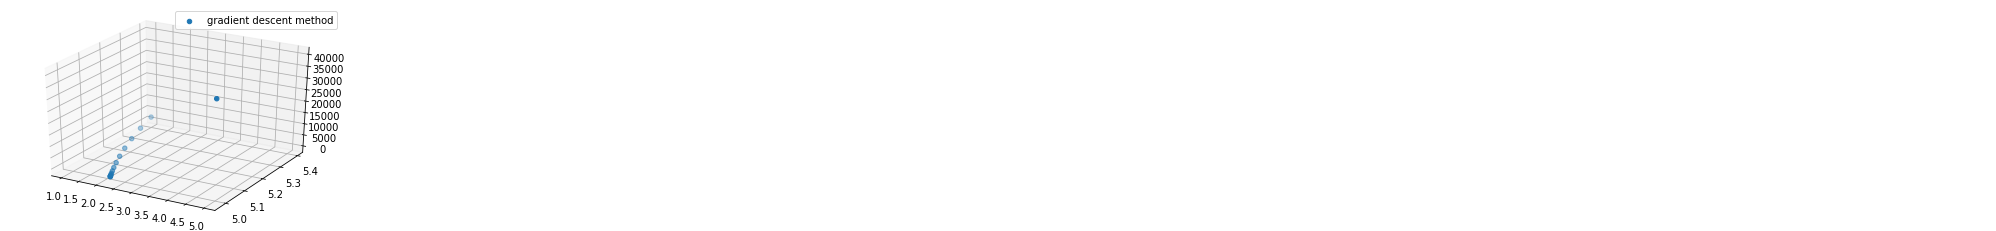

In [14]:
x1 = np.array([i[0] for i in val])
x2 = np.array([i[1] for i in val])
y = np.array(objectf)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x1, x2, y, label='gradient descent method')
ax.legend()

Armijo condition(Armijo条件)
The Armijo is used to determine a step size that is not too big. It tries to find a step size such that: 
$f(x_k+\alpha_k d_k) \leq f(x_k) +\alpha_k \nabla f(x_k)^T d_k$ 
, where $\beta \in (0,1)$

Here is an implementation of Armijo’s condition:
 + Initialization: set the values of $\alpha_0 =\theta^0, \beta$
 + Convergency condition $f(x_k+\alpha_m d_k) \leq f(x_k) +\alpha_m \beta \nabla f(x_k)^T d_k$ 
 + Update $\alpha_m=\theta^m$

In [15]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# the objective function
def func(x):
    return 100*np.square(np.square(x[0])-x[1])+np.square(x[0]-1)

# first order derivatives of the function
def dfunc(x):
    df1 = 400*x[0]*(np.square(x[0])-x[1])+2*(x[0]-1)
    df2 = -200*(np.square(x[0])-x[1])
    return np.array([df1, df2])


In [20]:
# the armijo algorithm
def armijo(valf, grad, niters):
    #beta = random.random()
    #sigma = random.uniform(0, .5)
    beta = 0.25
    sigma = 0.25
    (m_iter, iter_conv) = (0, 0)
    conval = [0,0]
    val = []
    objectf = []
    val.append(valf)
    objectf.append(func(valf))
    while m_iter <= niters:
        leftf = func(valf+np.power(beta, m_iter)*grad)
        rightf = func(valf) + sigma*np.power(beta, m_iter)*dfunc(valf).dot(grad)
        if leftf-rightf <= 0:
            iter_conv = m_iter
            conval = valf+np.power(beta, iter_conv)*grad
            break
        m_iter += 1
        val.append(conval)
        objectf.append(func(conval))
    return conval, func(conval), iter_conv, val, objectf


In [21]:

# initialization
start = np.array([-.3, .1])
direction = np.array([1, -2])
maximum_iterations = 30

In [22]:
converge_value, minimal, no_iter, val, objf = armijo(start, direction, maximum_iterations)


In [23]:
print("The value, minimal and number of iterations are " + str(converge_value) + \
    ", " + str(minimal) + ", " + str(no_iter))


The value, minimal and number of iterations are [-0.284375  0.06875 ], 1.6643064975738526, 3


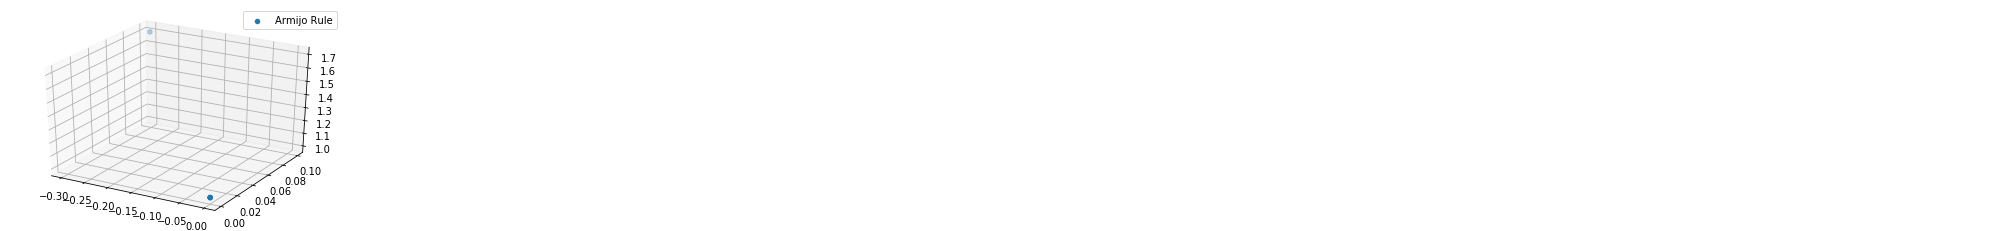

In [24]:
x = np.array([i[0] for i in val])
y = np.array([i[1] for i in val])
z = np.array(objf)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, label='Armijo Rule')
ax.legend()

In [25]:
yyy=np.arange(3)

In [26]:
yyy

array([0, 1, 2])

In [31]:
yyy.shape[0]

3